In [3]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context

archivo = "https://raw.githubusercontent.com/IgnacioPardo/Tecnologias_Exponenciales_2025/refs/heads/main/StreamingHistory_Extended.csv"
spotify = pd.read_csv(archivo)
spotify

C:\Users\49433670\AppData\Local\Temp\ipykernel_8408\1072994036.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify = pd.read_csv(archivo)


,ts,username,platform,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,is_podcast
0,2020-12-06T02:51:11Z,11145402699,"iOS 14.2 (iPhone12,3)",145610,AR,unknown,Hey Jude - Remastered 2015,The Beatles,1,spotify:track:0aym2LBJBk9DAYuHHutrIl,NaN,NaN,NaN,trackdone,fwdbtn,True,NaN,False,1607222710755,False
1,2020-12-06T02:53:31Z,11145402699,"iOS 14.2 (iPhone12,3)",138692,AR,unknown,Hacer un puente,La Franela,Hacer Un Puente,spotify:track:18Q3WTfyWX1tdS1cp42NhA,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223071185,False
2,2020-12-06T02:53:53Z,11145402699,"iOS 14.2 (iPhone12,3)",22662,AR,unknown,Happy Together - Remastered,The Turtles,All the Singles,spotify:track:2admbUc576sC6M0QeUkg2C,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223210387,False
3,2020-12-06T02:53:56Z,11145402699,"iOS 14.2 (iPhone12,3)",2716,AR,unknown,Demons,Imagine Dragons,Night Visions,spotify:track:5qaEfEh1AtSdrdrByCP7qR,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223233165,False
4,2020-12-06T02:53:57Z,11145402699,"iOS 14.2 (iPhone12,3)",116,AR,unknown,"Paint It, Black",The Rolling Stones,Aftermath,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223236453,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125344,2018-10-05T22:44:53Z,11145402699,"iOS 12.0 (iPhone8,1)",1365,AR,unknown,Gente Que No Sabe Lo Que Quiere,Litto Nebbia,Solo Se Trata de Vivir / Solopiano Vol. 1,spotify:track:3u8sP95YHOsYwRQfms6kgc,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779491211,False
125345,2018-10-05T22:44:54Z,11145402699,"iOS 12.0 (iPhone8,1)",1344,AR,unknown,11 Y 6,Fito Paez,Giros,spotify:track:2PkTjm1QAJCZbJ9MqC4RqA,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779492740,False
125346,2018-10-05T22:44:55Z,11145402699,"iOS 12.0 (iPhone8,1)",832,AR,unknown,Mientes,Charly García,Tango 4,spotify:track:670dXRMKr9vVtGk01dYeSr,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779494205,False
125347,2018-10-05T22:44:56Z,11145402699,"iOS 12.0 (iPhone8,1)",1194,AR,unknown,Apostar al Amor,Los Tipitos,Push,spotify:track:6PyBNCpOX5uOjKDNjNNgjq,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779495059,False


In [10]:
#1

print(spotify.columns)

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'user_agent_decrypted', 'master_metadata_track_name',
       'master_metadata_album_artist_name', 'master_metadata_album_album_name',
       'spotify_track_uri', 'episode_name', 'episode_show_name',
       'spotify_episode_uri', 'reason_start', 'reason_end', 'shuffle',
       'skipped', 'offline', 'offline_timestamp', 'is_podcast'],
      dtype='object')


In [ ]:
#2

fecha_inicio = spotify['ts'].min()
fecha_fin = spotify['ts'].max()

print(f"Se registraron canciones desde {fecha_inicio} hasta {fecha_fin}")

#2.2
from datetime import datetime


fecha_inicio_dt = datetime.strptime(fecha_inicio, '%Y-%m-%dT%H:%M:%SZ').date()
fecha_fin_dt = datetime.strptime(fecha_fin, '%Y-%m-%dT%H:%M:%SZ').date()


print(f"Las reproducciones se registraron desde {fecha_inicio_dt} hasta {fecha_fin_dt}.")

Se registraron canciones desde 2014-06-27T18:01:15Z hasta 2024-05-23T23:56:20Z
Las reproducciones se registraron desde 2014-06-27 hasta 2024-05-23.


In [28]:
#3

canciones_unicas = spotify[['master_metadata_track_name', 'master_metadata_album_artist_name']].dropna().drop_duplicates()

print(len(canciones_unicas))


10294


In [ ]:
#4
duracion_total_ms = spotify['ms_played'].sum()

duracion_total_segundos = duracion_total_ms / 1000
duracion_total_minutos = duracion_total_segundos / 60
duracion_total_horas = duracion_total_minutos / 60

print("Duración total de todas las reproducciones:")
print(f" - En milisegundos: {duracion_total_ms.round()} ms")
print(f" - En segundos: {duracion_total_segundos.round()} s")
print(f" - En minutos: {duracion_total_minutos.round()} min")
print(f" - En horas: {duracion_total_horas.round()} h")


Duración total de todas las reproducciones:
 - En milisegundos: 12583875841 ms
 - En segundos: 12583876.0 s
 - En minutos: 209731.0 min
 - En horas: 3496.0 h


In [9]:
#5

artista_mas_escuchado = spotify.groupby('master_metadata_album_artist_name')['ms_played'].sum().idxmax()

print(f"El artista más escuchado es: {artista_mas_escuchado}")

El artista más escuchado es: Charly García


In [21]:
#6

cancion_mas_escuchada = spotify.groupby('master_metadata_track_name')['ms_played'].sum().idxmax()

print(f"La canción más escuchada es: {cancion_mas_escuchada}")

La canción más escuchada es: Rain


In [20]:
#7

canciones_artista = spotify[spotify['master_metadata_album_artist_name'] == artista_mas_escuchado]
cancion_mas_escuchada_artista = canciones_artista.groupby('master_metadata_track_name')['ms_played'].sum().idxmax()

print(f"La canción más escuchada de {artista_mas_escuchado} es: {cancion_mas_escuchada_artista}")

La canción más escuchada de Vinnie Moore es: Rain


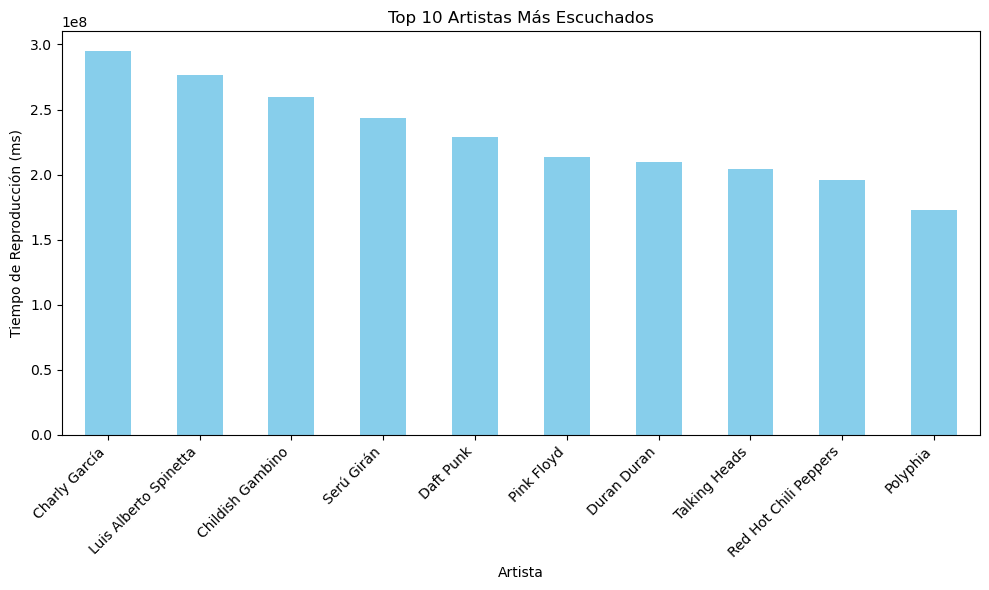

In [22]:
#8

top_artistas = spotify.groupby('master_metadata_album_artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_artistas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artistas Más Escuchados')
plt.xlabel('Artista')
plt.ylabel('Tiempo de Reproducción (ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


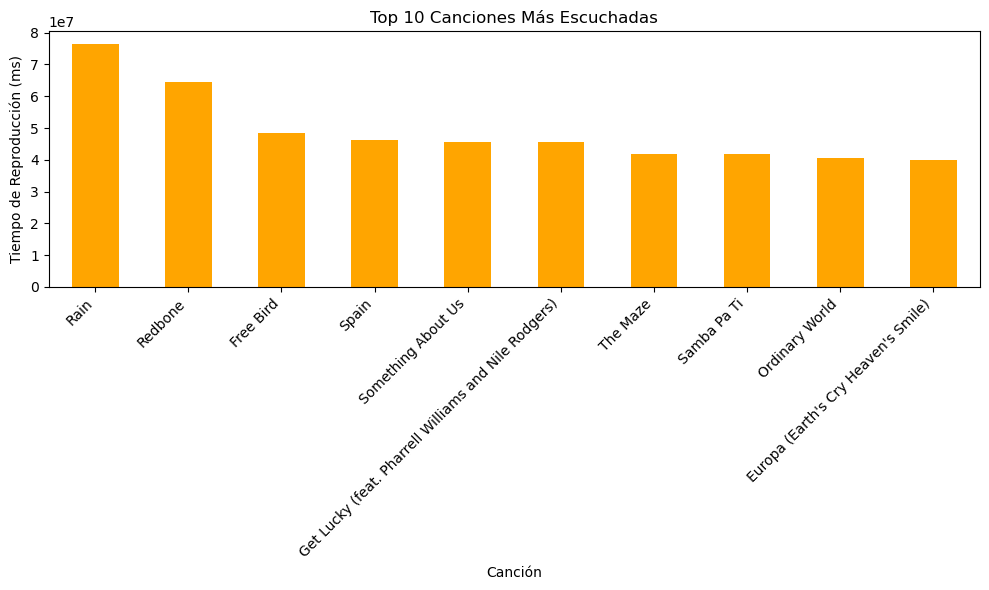

In [29]:
#9

top_canciones = spotify.groupby('master_metadata_track_name')['ms_played'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_canciones.plot(kind='bar', color='orange')
plt.title('Top 10 Canciones Más Escuchadas')
plt.xlabel('Canción')
plt.ylabel('Tiempo de Reproducción (ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:

tiempo_por_plataforma = spotify.groupby('platform')['ms_played'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
tiempo_por_plataforma.plot(kind='bar', color='purple')
plt.title('Distribución de Tiempo de Reproducción por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Tiempo de Reproducción (ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()